In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
In [21]: def generate_gradient(X, theta, y):
             sample_count = X.shape[0]
             # Calculate the gradient based on the matrix 1/M!(((h(x^i)-y^i))*x_j^i)
             
             predictions = X.dot(theta) # Shape: (sample_count,)
             # y has shape (sample_count, 1), flatten it to (sample_count,) for correct subtraction
             error_term = predictions - y.flatten() # Shape: (sample_count,)
             
             # X.T shape: (feature_count, sample_count)
             # error_term shape: (sample_count,)
             # gradient shape: (feature_count,)
             gradient = (1./sample_count) * X.T.dot(error_term)
             return gradient

Step 3: Define the function for reading datasets

In [29]:
def get_training_data(lr2_data):
    orig_data = np.loadtxt(lr2_data,skiprows=1)  # Ignore the title in the first row of the dataset.
    cols = orig_data.shape[1]
    return (orig_data, orig_data[:, :cols - 1], orig_data[:, cols-1:])

In [30]:
In [23]: def gradient_descending(X, y, theta, alpha):
             Jthetas = [] # Record the change trend of the cost function J(θ) to confirm the gradient descent is working
             # ... (other initializations) ...
             index = 0
             gradient = generate_gradient(X, theta, y) # Calculate the gradient
             while not np.all(np.absolute(gradient) <= 1e-5): # End the calculation when the gradient is less than a threshold
                 theta = theta - alpha*gradient # Update theta
                 gradient = generate_gradient(X, theta, y) # Calculate the new gradient.
                 
                 # Calculate the loss function
                 predictions = X.dot(theta)
                 # Ensure error for loss is also calculated correctly using y.flatten()
                 current_error = predictions - y.flatten() # Shape: (sample_count,)
                 Jtheta = np.dot(current_error, current_error) # Sum of squared errors (scalar)
                                                              # If MSE is desired, divide by sample_count or 2*sample_count

                 if (index+1) % 10 == 0: # Record the result every 10 calculations. (Corrected condition from index % 10 == 0 if you want it at 10, 20...)
                     # Jtheta is now a scalar, so Jtheta[0] is not needed and would cause an error.
                     Jthetas.append((index, Jtheta)) 
                 index +=1
             return theta,Jthetas

Step 6: Define the function for visualizing the change curve of the loss function
input:

In [31]:
# Plot the loss function change curve.
def showJTheta(diff_value):
    p_x = []
    p_y = []
    for (index,sum) in diff_value:
        p_x.append(index)
        p_y.append(sum)
    plt.plot(p_x, p_y, color='b')
    plt.xlabel('steps')
    plt.ylabel('loss function')
    plt.title('step - loss function curve')
    plt.show()

Step 7: Define the function for visualizing data points and the fitted curve.
Input:

In [32]:
# Plot the actual data points and the fitted curve.
def showlinearcurve(theta, sample_training_set):
    x, y = sample_training_set[:, 1], sample_training_set[:, 2]
    z = theta[0] + theta[1] * x
    plt.scatter(x, y, color='b', marker='x',label="sample data")
    plt.plot(x, z, 'r', color="r",label="regression curve")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression Curve')
    plt.legend()
    plt.show()

Step 8 Plot the final results
Input:

In [33]:
def init_theta(feature_count):
    return np.zeros(feature_count)

w:3.0077910965506875 b:1.6683651571482958


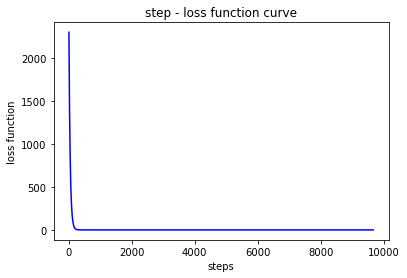

C:\Users\nwank\AppData\Local\Temp\ipykernel_22428\1812434709.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, z, 'r', color="r",label="regression curve")


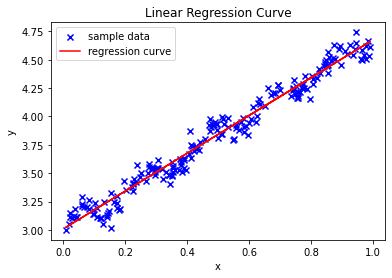

In [35]:
# Read the dataset.
training_data_include_y, training_x, y = get_training_data("lr2_data.txt")
# Obtain the numbers of the samples and features, respectively.
sample_count, feature_count = training_x.shape
# Define the learning step α.
alpha = 0.01
# Initialize 0.
theta = init_theta(feature_count)
# Obtain the final parameter 0 and cost.
result_theta,Jthetas = gradient_descending(training_x, y, theta, alpha)
# Display the parameter.
print("w:{}".format(result_theta[0]), "b:{}".format(result_theta[1]))
# print("w:{}".format(result_theta[0][0]), "b:{}".format(result_theta[1][0]))
showJTheta(Jthetas)
showlinearcurve(result_theta, training_data_include_y)